In [20]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [2]:
df=pd.read_csv(r"C:\Users\rajes\Downloads\50_Startups.csv")

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.shape

(50, 5)

In [5]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
df['Spent'] = df['R&D Spend'] + df['Administration'] + df['Marketing Spend']

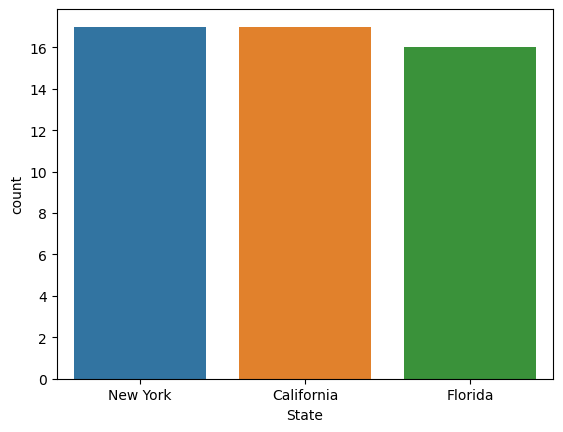

In [7]:
sns.countplot(x='State',data=df)
plt.show()

<Axes: xlabel='Spent', ylabel='Density'>

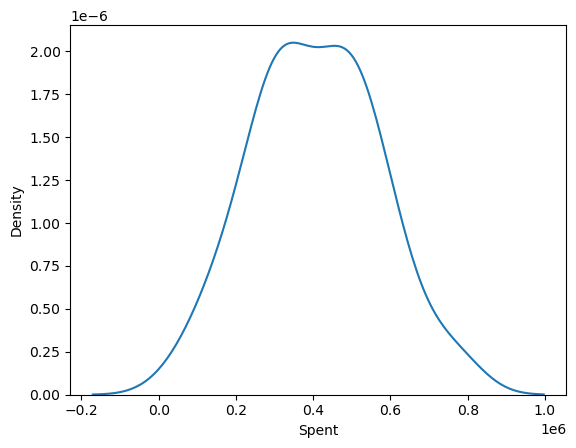

In [8]:
sns.kdeplot(x='Spent',data=df)

<Axes: xlabel='State', ylabel='Profit'>

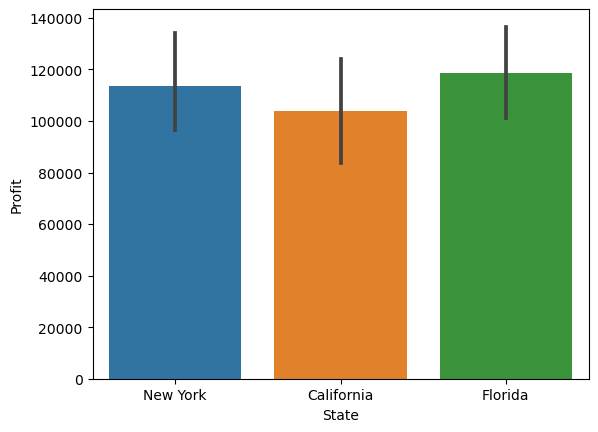

In [9]:
sns.barplot(y='Profit', x='State', data=df)

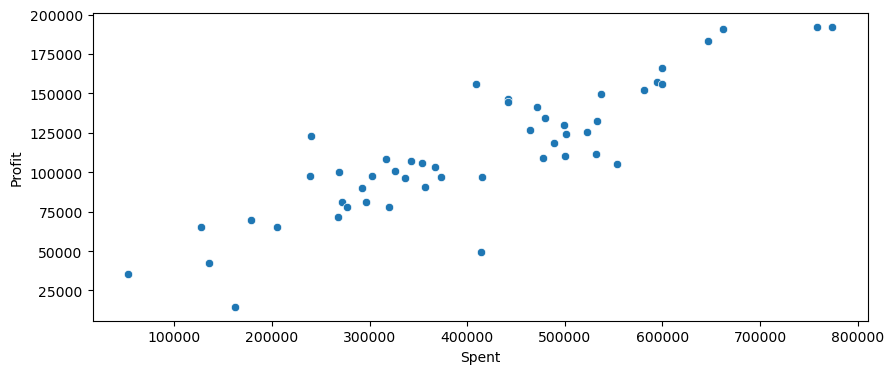

In [10]:
plt.figure(figsize=(10,4))
sns.scatterplot(y='Profit',x='Spent',data=df)
plt.show()

In [11]:
categrl = ['State']
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_column=pd.DataFrame(encoder.fit_transform(df[categrl]),
                         columns=encoder.get_feature_names_out(categrl))

C:\Users\rajes\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [12]:
num =['Spent']
scale = StandardScaler()
scale_column=pd.DataFrame(scale.fit_transform(df[num]),
                       columns=scale.get_feature_names_out(num))

In [13]:
x=pd.concat([encoded_column, scale_column], axis=1)
y=df['Profit']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)

In [15]:
model= LinearRegression()

In [16]:
model.fit(x_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(x_test)

In [18]:
r2 = r2_score(y_test, y_pred)
print(r2)

0.6820948828247877


In [19]:
MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error =", MAE)
MSE = mean_squared_error(y_test, y_pred)
print("Mean Square Error =", MSE)
RMSE = np.sqrt(MSE)
print("Root Mean Square Error =", RMSE)

Mean Absolute Error = 17075.18773934071
Mean Square Error = 447292813.87019795
Root Mean Square Error = 21149.29818859713


In [21]:
lasso_model=Lasso()

In [22]:
lasso_model.fit(x_train,y_train)

Lasso()

In [23]:
y_pred = lasso_model.predict(x_test)

In [24]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("R2 Score : ", r2)
print("MAE : ", mae)
print("MSE : ", mse)
print("RMSE : ", rmse)

R2 Score :  0.6821488889063099
MAE :  17074.052342018567
MSE :  447216827.2601528
RMSE :  21147.501678925404


In [25]:
ridge_model=Ridge()

In [26]:
ridge_model.fit(x_train,y_train)

Ridge()

In [27]:
y_pred = ridge_model.predict(x_test)

In [28]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("R2 Score : ", r2)
print("MAE : ", mae)
print("MSE : ", mse)
print("RMSE : ", rmse)

R2 Score :  0.7015381172586301
MAE :  16611.565156342334
MSE :  419936163.8171003
RMSE :  20492.344029346674


In [29]:
el_model=ElasticNet()

In [30]:
el_model.fit(x_train,y_train)

ElasticNet()

In [31]:
y_pred = el_model.predict(x_test)

In [32]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("R2 Score : ", r2)
print("MAE : ", mae)
print("MSE : ", mse)
print("RMSE : ", rmse)

R2 Score :  0.72764152530291
MAE :  15782.991379076486
MSE :  383208642.91565853
RMSE :  19575.715642490788
